# Time Series Forecasting

**Problem Statement** : Predict what will be the Sales in next 6 months.


## Reading the data

In [14]:
import pandas as pd
import numpy as np


StoreSalesData=pd.read_excel('C:\\Users\\HP\\Desktop\\Ivy\\3.Python\\Python Pred Modeling All notebooks + Datasets.zip (Unzipped Files)\\Super Store Sales data.xls')
StoreSalesData.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,China,North Asia,OFF-PA-10000026,Office Supplies,Paper,"Eaton Cards & Envelopes, 8.5 x 11",197.280,4,0.00,35.400
1,2,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,China,North Asia,FUR-FU-10000944,Furniture,Furnishings,"Tenex Door Stop, Black",307.230,7,0.00,21.420
2,3,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,China,North Asia,TEC-CO-10002526,Technology,Copiers,"Sharp Wireless Fax, Digital",1422.240,4,0.00,526.200
3,4,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,China,North Asia,TEC-AC-10002255,Technology,Accessories,"Memorex Keyboard, Erganomic",207.450,3,0.00,78.750
4,5,IN-2014-63178,2014-06-24,2014-06-30,Standard Class,SO-20335,Sean O'Donnell,Consumer,Marikina,National Capital,Philippines,Southeast Asia,OFF-AP-10002882,Office Supplies,Appliances,"KitchenAid Coffee Grinder, Silver",121.074,2,0.15,37.014


## Looking at the data summary

In [15]:
StoreSalesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         11000 non-null  int64         
 1   Order ID       11000 non-null  object        
 2   Order Date     11000 non-null  datetime64[ns]
 3   Ship Date      11000 non-null  datetime64[ns]
 4   Ship Mode      11000 non-null  object        
 5   Customer ID    11000 non-null  object        
 6   Customer Name  11000 non-null  object        
 7   Segment        11000 non-null  object        
 8   City           11000 non-null  object        
 9   State          11000 non-null  object        
 10  Country        11000 non-null  object        
 11  Region         11000 non-null  object        
 12  Product ID     11000 non-null  object        
 13  Category       11000 non-null  object        
 14  Sub-Category   11000 non-null  object        
 15  Product Name   1100

## Observing the Quantitative, Qualitative and Categorical variables in data

In [16]:
StoreSalesData.nunique()

Row ID           11000
Order ID          5436
Order Date        1265
Ship Date         1378
Ship Mode            4
Customer ID        795
Customer Name      795
Segment              3
City               655
State              179
Country             23
Region               4
Product ID        2721
Category             3
Sub-Category        17
Product Name      1913
Sales             8815
Quantity            14
Discount            19
Profit            8120
dtype: int64

## Feature Engineering in data

In [17]:
# Function to get month from a date
def Function_get_month(inpDate):
    return(inpDate.month)

# Function to get Year from a date
def Function_get_year(inpDate):
    return(inpDate.year)


# Creating new columns
StoreSalesData['Month']=StoreSalesData['Order Date'].apply(Function_get_month)
StoreSalesData['Year']=StoreSalesData['Order Date'].apply(Function_get_year)

StoreSalesData.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Year
0,1,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,...,OFF-PA-10000026,Office Supplies,Paper,"Eaton Cards & Envelopes, 8.5 x 11",197.280,4,0.00,35.400,8,2013
1,2,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,...,FUR-FU-10000944,Furniture,Furnishings,"Tenex Door Stop, Black",307.230,7,0.00,21.420,8,2013
2,3,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,...,TEC-CO-10002526,Technology,Copiers,"Sharp Wireless Fax, Digital",1422.240,4,0.00,526.200,8,2013
3,4,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,...,TEC-AC-10002255,Technology,Accessories,"Memorex Keyboard, Erganomic",207.450,3,0.00,78.750,8,2013
4,5,IN-2014-63178,2014-06-24,2014-06-30,Standard Class,SO-20335,Sean O'Donnell,Consumer,Marikina,National Capital,...,OFF-AP-10002882,Office Supplies,Appliances,"KitchenAid Coffee Grinder, Silver",121.074,2,0.15,37.014,6,2014


In [18]:
# Checking unique values in Year Column
StoreSalesData['Year'].unique()

array([2013, 2014, 2011, 2012], dtype=int64)

In [19]:
# Checking unique values in Month column
StoreSalesData['Month'].unique()

array([ 8,  6,  5,  1,  7,  2, 10,  9,  3, 11,  4, 12], dtype=int64)

## Sales Quantity for each month

In [20]:
# Aggregating the sales quantity for each month for all categories
pd.crosstab(columns=StoreSalesData['Month'],
            index=StoreSalesData['Year'],
            values=StoreSalesData['Quantity'],
            aggfunc='sum')

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2011,328,361,442,406,517,631,388,737,722,837,856,1028
2012,531,425,427,427,901,924,380,978,728,1092,1068,847
2013,665,448,527,448,1228,1273,716,1307,1220,1021,1010,1120
2014,951,704,890,727,1284,1416,738,1478,1302,1588,1632,1548


## Visualizing the Total sales Quantity per month

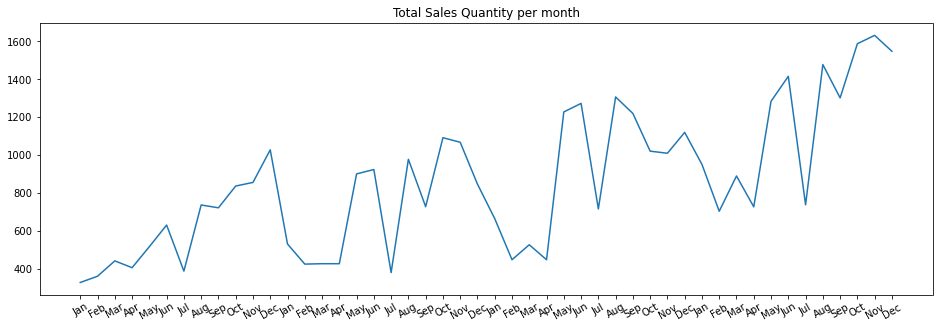

In [21]:
import matplotlib.pyplot as plt
SalesQuantity=pd.crosstab(columns=StoreSalesData['Year'],
            index=StoreSalesData['Month'],
            values=StoreSalesData['Quantity'],
            aggfunc='sum').melt()['value']

MonthNames=['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec']*4

# Plotting the sales
%matplotlib inline
SalesQuantity.plot(kind='line', figsize=(16,5), title='Total Sales Quantity per month')
# Setting the x-axis labels
plotLabels=plt.xticks(np.arange(0,48,1),MonthNames, rotation=30)

In [22]:
SalesQuantity.values

array([ 328,  361,  442,  406,  517,  631,  388,  737,  722,  837,  856,
       1028,  531,  425,  427,  427,  901,  924,  380,  978,  728, 1092,
       1068,  847,  665,  448,  527,  448, 1228, 1273,  716, 1307, 1220,
       1021, 1010, 1120,  951,  704,  890,  727, 1284, 1416,  738, 1478,
       1302, 1588, 1632, 1548], dtype=int64)

[          nan           nan           nan           nan           nan
           nan  612.875       624.          626.04166667  626.29166667
  643.16666667  671.375       683.25        692.95833333  703.25
  714.125       733.58333333  734.875       732.91666667  739.45833333
  744.58333333  749.625       764.125       792.29166667  820.83333333
  848.54166667  882.75        900.29166667  894.91666667  903.875
  927.16666667  949.75        975.54166667 1002.29166667 1016.25
 1024.54166667 1031.41666667 1039.45833333 1050.         1077.04166667
 1126.58333333 1170.33333333           nan           nan           nan
           nan           nan           nan]
[0.83231366 0.60318594 0.68054972 0.58726348 1.24054726 1.28549293
 0.63809588 1.28688007 1.12162225 1.2643258  1.23467646 1.22504657
 0.83231366 0.60318594 0.68054972 0.58726348 1.24054726 1.28549293
 0.63809588 1.28688007 1.12162225 1.2643258  1.23467646 1.22504657
 0.83231366 0.60318594 0.68054972 0.58726348 1.24054726 1.28549293

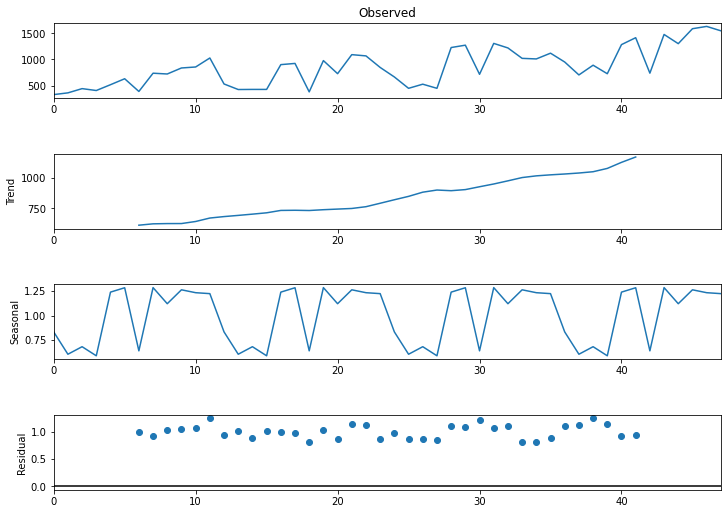

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = SalesQuantity.values
result = seasonal_decompose(series, model='multiplicative', freq=12)
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)
result.plot()
CurrentFig=plt.gcf()
CurrentFig.set_size_inches(11,8)
plt.show()

## Creating the predictive model for Total Sales Data

Next Six Month Forecast: 49     925.032263
50    1067.926671
51    1180.298892
52    1505.524540
53    1734.650068
54    1024.286629
Name: Forecast, dtype: float64
#### Accuracy of model: 77.0 ####


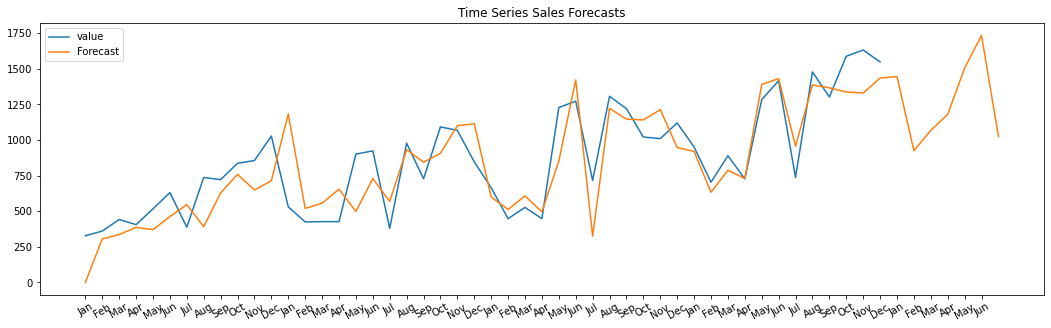

In [24]:
# Importing the algorithm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')


# Train the model on the full dataset 
SarimaxModel = SARIMAX(SalesQuantity,  
                        order = (5, 1, 10),  
                        seasonal_order =(1, 0, 0, 12))
SalesModel = SarimaxModel.fit()
  
# Forecast for the next 6 months
forecast = SalesModel.predict(start = 0,
                          end = (len(SalesQuantity)) + 6,
                          typ = 'levels').rename('Forecast')
print("Next Six Month Forecast:",forecast[-6:])

# Plot the forecast values
SalesQuantity.plot(figsize = (18, 5), legend = True, title='Time Series Sales Forecasts')
forecast.plot(legend = True, figsize=(18,5))

# Measuring the accuracy of the model
MAPE=np.mean(abs(SalesQuantity-forecast)/SalesQuantity)*100
print('#### Accuracy of model:', round(100-MAPE,2), '####')

# Printing month names in X-Axis
MonthNames=MonthNames+MonthNames[0:6]
plotLabels=plt.xticks(np.arange(0,54,1),MonthNames, rotation=30)